<a href="https://colab.research.google.com/github/Theveetha/Telecom_Churn_Prediction/blob/main/Telecom_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***TELECOM CHURN PREDICTION***
**GOAL:**
1. Do a detailed analysis to identify and visualize which factors contribute to the customer churn.
2. Perform model prediction for various models and find the best among them.

**INDEX:**
*   [Required Setup](#Required_Setup)
*   [Data Dictionary](#Data_Dictionary)
*   [Analysing the Fundamentals](#Analysing_The_Fundamental)
*   [Exploratory Data Analysis](#Exploratory_Data_Analysis)
*   [Data Preprocessing](#Data_Preprocessing)
*   [Data Modeling](#Data_Modeling)
    *   [Naive Bayes](#Naive_Bayes)
    *   [Logistic Regression](#Logistic_Regression)
    *   [K Nearest Neighbour](#KN_Neighbour)
    *   [Decision Tree](#Decision_Tree)
    *   [Random Forest](#Random_Forest)
    *   [Support Vector Machine](#Support_Vector_Machine)
*   [Final Analysis](#Final_Analysis)



<a name="Required_Setup"></a>
# **REQUIRED SETUP**
**GOAL**
1. Import the required libraries for our analysis
2. Connect to the Drive to load the dataset
3. Read the multiple csv file and create a single Dataframe

## **Import Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Set max columns and rows
# pd.set_option('display.max_columns',None)
# pd.set_option('display.max_rows',None)

## **Mount Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## **Import the dataset**

In [3]:
churn_data = pd.read_csv('/content/drive/MyDrive/Stats&ML_Dataset/churn_data.csv')
cust_data = pd.read_csv('/content/drive/MyDrive/Stats&ML_Dataset/customer_data.csv')
internet_data = pd.read_csv('/content/drive/MyDrive/Stats&ML_Dataset/internet_data.csv')

# Data Dimension
print(f"Churn has {churn_data.shape[0]} rows and {churn_data.shape[1]} columns")
print(f"Customer has {cust_data.shape[0]} rows and {cust_data.shape[1]} columns")
print(f"Internet has {internet_data.shape[0]} rows and {internet_data.shape[1]} columns")

Churn has 7043 rows and 9 columns
Customer has 7043 rows and 5 columns
Internet has 7043 rows and 9 columns


In [4]:
# Data Columns
for cols in [churn_data,cust_data,internet_data]:
  print(list(cols))

['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents']
['customerID', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']


In [5]:
# Data Merge
original_data = pd.merge(cust_data,internet_data,how='inner',on='customerID')
original_data = pd.merge(original_data,churn_data,how='inner',on='customerID')

# Making a copy to work for our analysis
data = original_data.copy()
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No phone service,DSL,No,Yes,No,...,No,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,No,DSL,Yes,No,Yes,...,No,No,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,No,DSL,Yes,Yes,No,...,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No phone service,DSL,Yes,No,Yes,...,No,No,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,No,Fiber optic,No,No,No,...,No,No,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<a name="Data_Dictionary"></a>
# **DATA DICTIONARY**
**GOAL**
1. Read the data description to understand the purpose of each variable

In [6]:
desc = pd.read_csv('/content/drive/MyDrive/Stats&ML_Dataset/Telecom_Churn_Data_Dictionary.csv',encoding='latin-1')
desc
# NOTE: Here we are using encoding function as this description file is consisting of some additional languages which needs to be encoded

,S.No.,Variable Name,Meaning
0,1,CustomerID,The unique ID of each customer
1,2,Gender,The gender of a person
2,3,SeniorCitizen,Whether a customer can be classified as a seni...
3,4,Partner,If a customer is married/ in a live-in relatio...
4,5,Dependents,If a customer has dependents (children/ retire...
5,6,Tenure,The time for which a customer has been using t...
6,7,PhoneService,Whether a customer has a landline phone servic...
7,8,MultipleLines,Whether a customer has multiple lines of inter...
8,9,InternetService,The type of internet services chosen by the cu...
9,10,OnlineSecurity,Specifies if a customer has online security.


<a name="Analysing_The_Fundamentals"></a>
# **ANALYSING THE FUNDAMENTALS**
**GOAL**
1. Understand the shape and type of the data
2. Analyse the Categorical and Numerical variables
3. Do fundamental data cleaning and data transformation on cases where all its required

## **Dimension**

In [7]:
print(f"Number of Columns : {data.shape[1]}")
print(f"Number of Rows : {data.shape[0]}")

Number of Columns : 21
Number of Rows : 7043


## **Detailed Info on all columns**

In [8]:
# Function for extracting information on all columns
def info(data):
  cols = data.columns
  dtype = data.dtypes
  unique_count = [data[cols].nunique() for cols in data.columns]
  missing_value_count = data.isnull().sum()
  sample = data.head(2).T
  unique_values = [data[cols].unique() for cols in data.columns]

  data_info = pd.DataFrame({'Column_Name':cols
                            ,'Data_Type':dtype
                            ,'Missing_Value_Per':missing_value_count
                            ,'Unique_Value_Count':unique_count
                            ,'Unique_Values':unique_values
                            })
  data_info = pd.concat([data_info,sample],axis=1)
  data_info.rename(columns={0:'Sample_1',1:'Sample_2'},inplace=True)

  data_info.reset_index(drop=True,inplace=True)
  return data_info

info(data)

,Column_Name,Data_Type,Missing_Value_Per,Unique_Value_Count,Unique_Values,Sample_1,Sample_2
0,customerID,object,0,7043,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...",7590-VHVEG,5575-GNVDE
1,gender,object,0,2,"[Female, Male]",Female,Male
2,SeniorCitizen,int64,0,2,"[0, 1]",0,0
3,Partner,object,0,2,"[Yes, No]",Yes,No
4,Dependents,object,0,2,"[No, Yes]",No,No
5,MultipleLines,object,0,3,"[No phone service, No, Yes]",No phone service,No
6,InternetService,object,0,3,"[DSL, Fiber optic, No]",DSL,DSL
7,OnlineSecurity,object,0,3,"[No, Yes, No internet service]",No,Yes
8,OnlineBackup,object,0,3,"[Yes, No, No internet service]",Yes,No
9,DeviceProtection,object,0,3,"[No, Yes, No internet service]",No,Yes


## **Numerical and Categorical Columns**

In [9]:
num_cols = [cols for cols in data.columns if data[cols].dtype != 'O']
cat_cols = [cols for cols in data.columns if data[cols].dtype == 'O']
print(f"Number of Numerical Columns : {len(num_cols)}")
print(f"Number of Categorical Columns : {len(cat_cols)}")

Number of Numerical Columns : 3
Number of Categorical Columns : 18


## **Duplicate Rows**

In [10]:
count = data[data.duplicated()].shape
print(f"There are no duplicates in the dataset" if count[0]==0 else f"There are {count[0]} duplicates in the dataset")

There are no duplicates in the dataset


## **OBSERVATION**
1. TotalCharges should be typecasted to float type as currently its of object type
2. CustomerId has all values to be unique, but we are not deleting it as we will be using it for future analysis
3. Senior Citizen is a categorical column having values 0,1 so we can type cast it to numerical
4. We can see that there are no columns with single unique values
5. All the variables have 0 missing value
6. There are no duplicate records in the dataset
7. For easy visualization we can make the labels concise

## **Data Cleaning - Type Casting**

In [11]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors='coerce')
data['TotalCharges'].dtypes

dtype('float64')

In [12]:
data['SeniorCitizen'] = data['SeniorCitizen'].astype(str)
data['SeniorCitizen'].dtypes

dtype('O')

In [13]:
num_cols = [cols for cols in data.columns if data[cols].dtype != 'O']
cat_cols = [cols for cols in data.columns if data[cols].dtype == 'O']
print(f"Number of Numerical Columns : {len(num_cols)}")
print(f"Number of Categorical Columns : {len(cat_cols)}")

Number of Numerical Columns : 3
Number of Categorical Columns : 18


## **Making Labels Concise**
Let's make the categorical labels more concise. For instance, we will convert the categorical label 'Bank transfer (automatic)' to 'Bank transfer' to make it easier to access (and display) during visualization.

In [14]:
# Shorten the labels:
value_mapper = {'Female':'F', 'Male':'M',
                'Yes':'Y', 'No':'N',
                'No phone service':'No Phone', 'Fiber optic':'Fiber',
                'No internet service':'No Internet', 'Month-to-month':'Monthly',
                'Bank transfer (automatic)': 'Bank transfer',
                'Credit card (automatic)': 'Credit card',
                }
data.replace(to_replace=value_mapper,inplace=True)
data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,F,0,Y,N,No Phone,DSL,N,Y,N,...,N,N,1,N,Monthly,Y,Electronic check,29.85,29.85,N
1,5575-GNVDE,M,0,N,N,N,DSL,Y,N,Y,...,N,N,34,Y,One year,N,Mailed check,56.95,1889.50,N


## **Five Number Summary**

In [15]:
data[num_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [16]:
data[cat_cols].describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PhoneService,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,2,3,2,4,2
top,7590-VHVEG,M,0,N,N,N,Fiber,N,N,N,N,N,N,Y,Monthly,Y,Electronic check,N
freq,1,3555,5901,3641,4933,3390,3096,3498,3088,3095,3473,2810,2785,6361,3875,4171,2365,5174


## **OBSERVATION**
1. Post Type casting there are 11 missing values in the TotalCharges column
2. Since the difference between mean and median is less than 10% of 1-SD, replace the missing values with Median

## **Data Manipulation - Handle Missing Value**

In [17]:
data['TotalCharges'].fillna(data['TotalCharges'].median(),inplace=True)
data.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
tenure              False
PhoneService        False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

## **Detailed Info on all columns**

In [18]:
info(data)

,Column_Name,Data_Type,Missing_Value_Per,Unique_Value_Count,Unique_Values,Sample_1,Sample_2
0,customerID,object,0,7043,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...",7590-VHVEG,5575-GNVDE
1,gender,object,0,2,"[F, M]",F,M
2,SeniorCitizen,object,0,2,"[0, 1]",0,0
3,Partner,object,0,2,"[Y, N]",Y,N
4,Dependents,object,0,2,"[N, Y]",N,N
5,MultipleLines,object,0,3,"[No Phone, N, Y]",No Phone,N
6,InternetService,object,0,3,"[DSL, Fiber, N]",DSL,DSL
7,OnlineSecurity,object,0,3,"[N, Y, No Internet]",N,Y
8,OnlineBackup,object,0,3,"[Y, N, No Internet]",Y,N
9,DeviceProtection,object,0,3,"[N, Y, No Internet]",N,Y


<a name="Exploratory_Data_Analysis"></a>
# **EXPOLATORY DATA ANALYSIS**
**GOAL**
1. Do an univariate analysis, bivariate analysis and multivariate analysis for all the variables with respect to the target variable (Churn)
2. Check on how individual variables play a role to affect the atiration rate

## **Functions**

In [19]:
# Function to remove the border in graph
def section(sec):
  sec.spines['bottom'].set_visible(True)
  sec.spines['top'].set_visible(False)
  sec.spines['left'].set_visible(False)
  sec.spines['right'].set_visible(False)
  return sec

In [20]:
# Function to remove content for empty subplot
def empty_subplot(sec):
  sec.xaxis.set_visible(False)
  sec.yaxis.set_visible(False)
  for position in ['bottom','top','left','right']:
    sec.spines[position].set_visible(False)

In [21]:
# Function to remove grid lines
def gridlines(sec):
  sec.grid(axis='y',linestyle=':',color='black',alpha=0.3)

## **Frequency Distribution on Categorical variables**
Seeing how the categorical columns are distributed in general

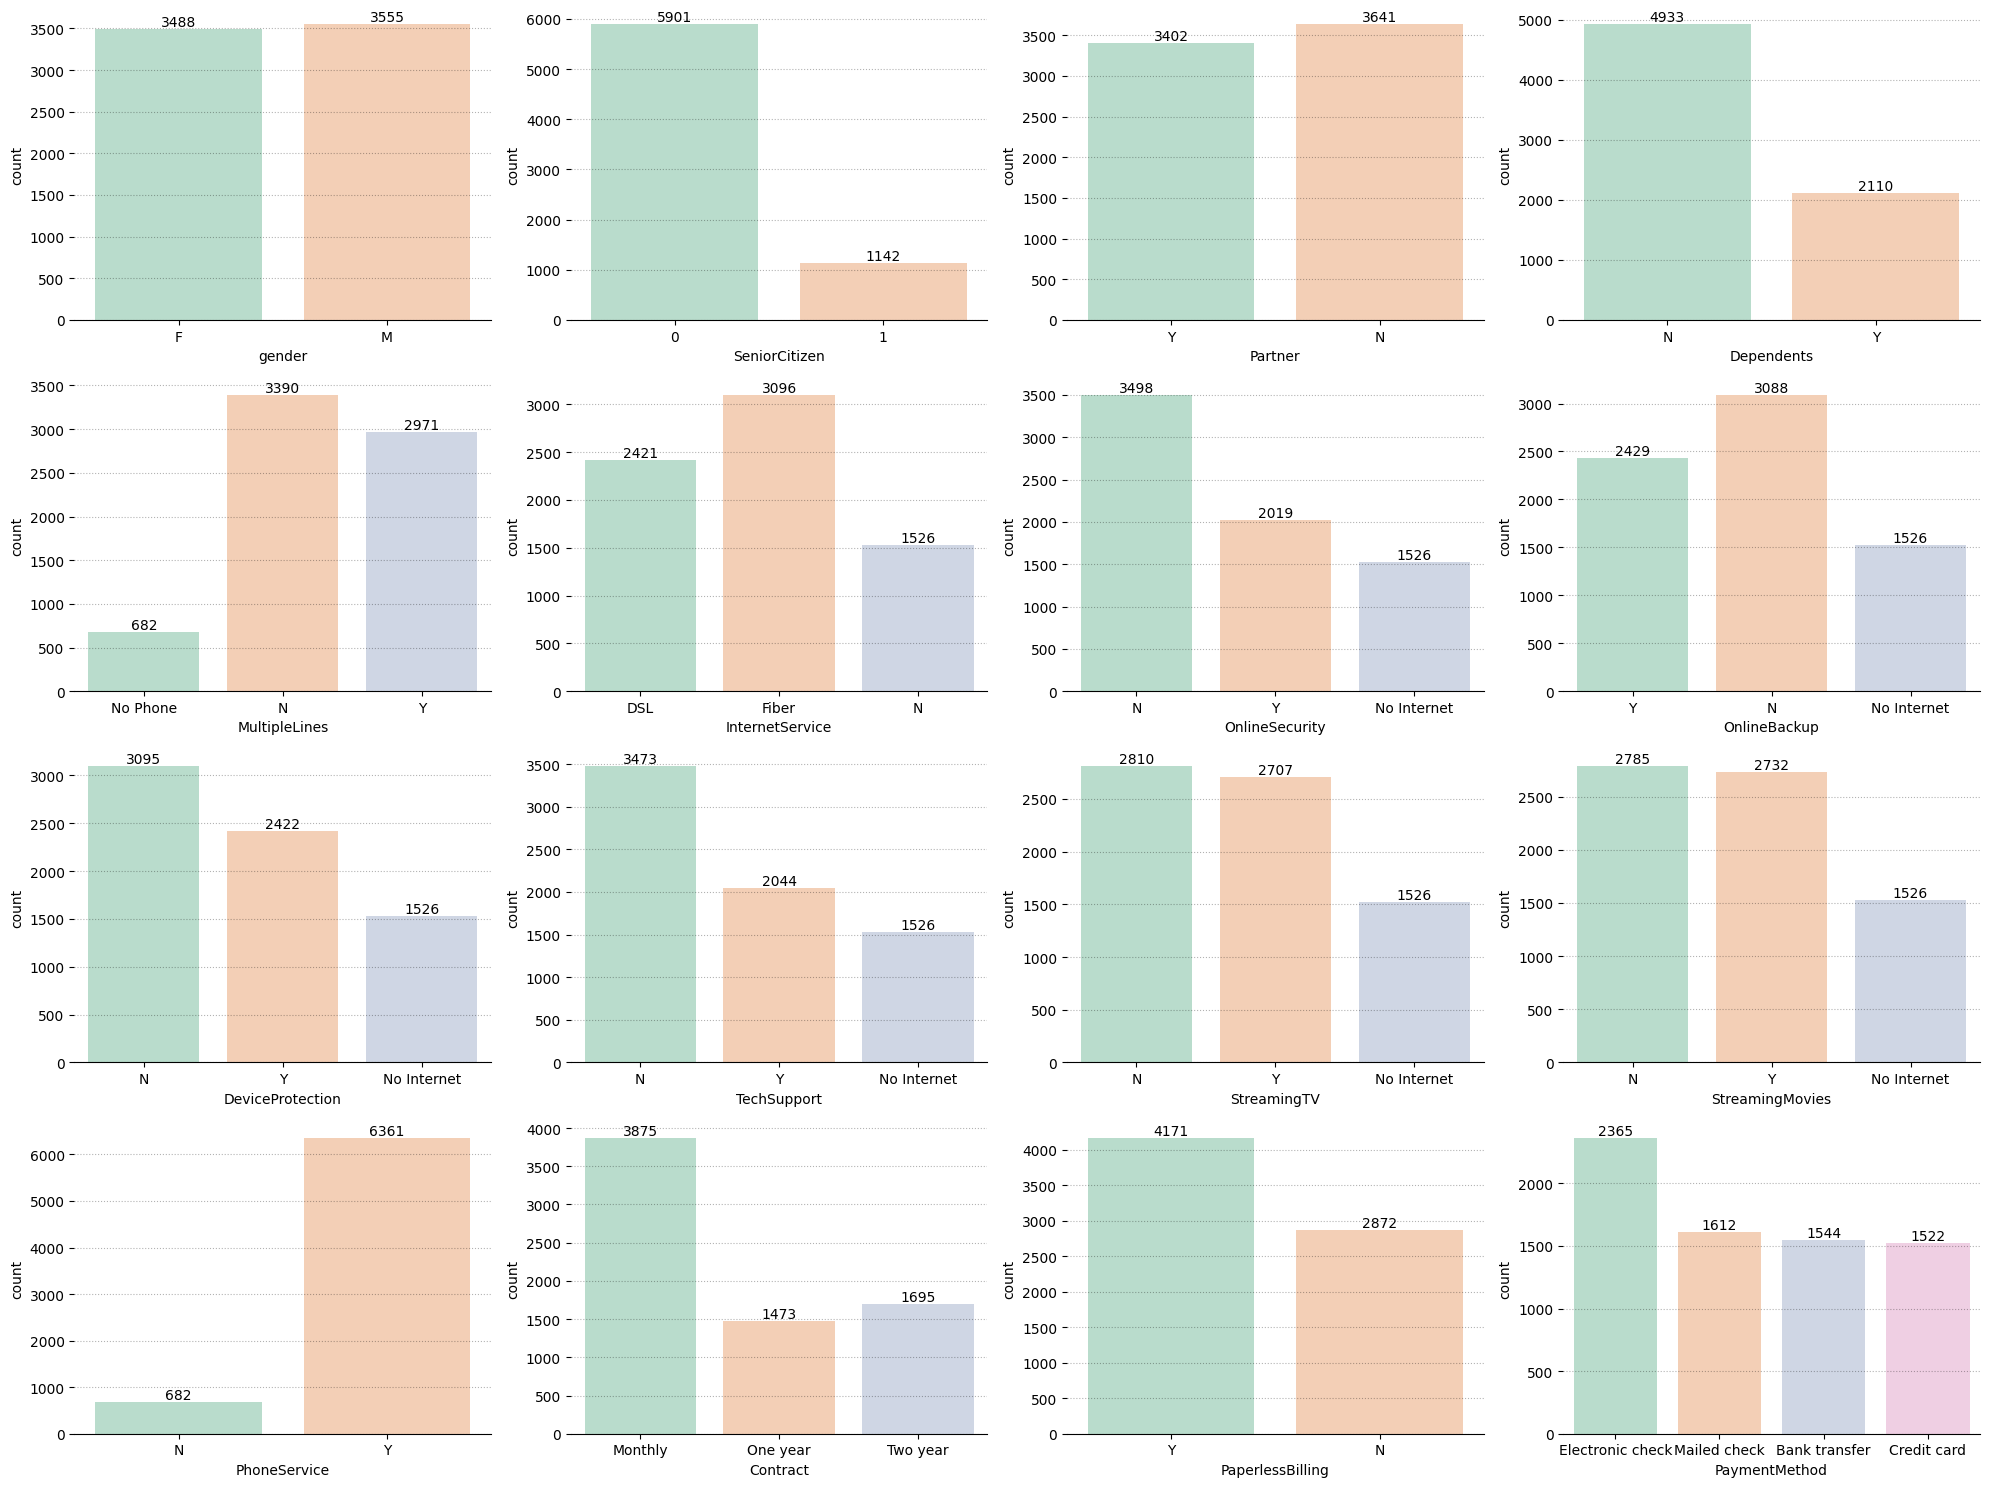

In [22]:
fig, axes = plt.subplots(nrows=4,ncols=4,figsize=(20,15))
axes = axes.flatten()

for i,cols in enumerate(cat_cols[1:17]):
  sns.countplot(ax=axes[i],data=data,x=cols,palette='Pastel2')
  count = data[cols].nunique()
  for j in range(0,count):
    axes[i].bar_label(axes[i].containers[j])
  section(axes[i])
  gridlines(axes[i])
  axes[i].set_xlabel(cols)

plt.tight_layout()
plt.show()

## **OBSERVATION**
1. We have more younger people using internet connection compared to the senior citizens
2. Also when there is no internet service there is no possiblity of the customer to access online security, backup, device protection, tech support, streaming TV or movies
3. There are some customers who have no phone service.

## **Frequency Distribution on Numerical variables**
Seeing how the numerical columns are distributed in general

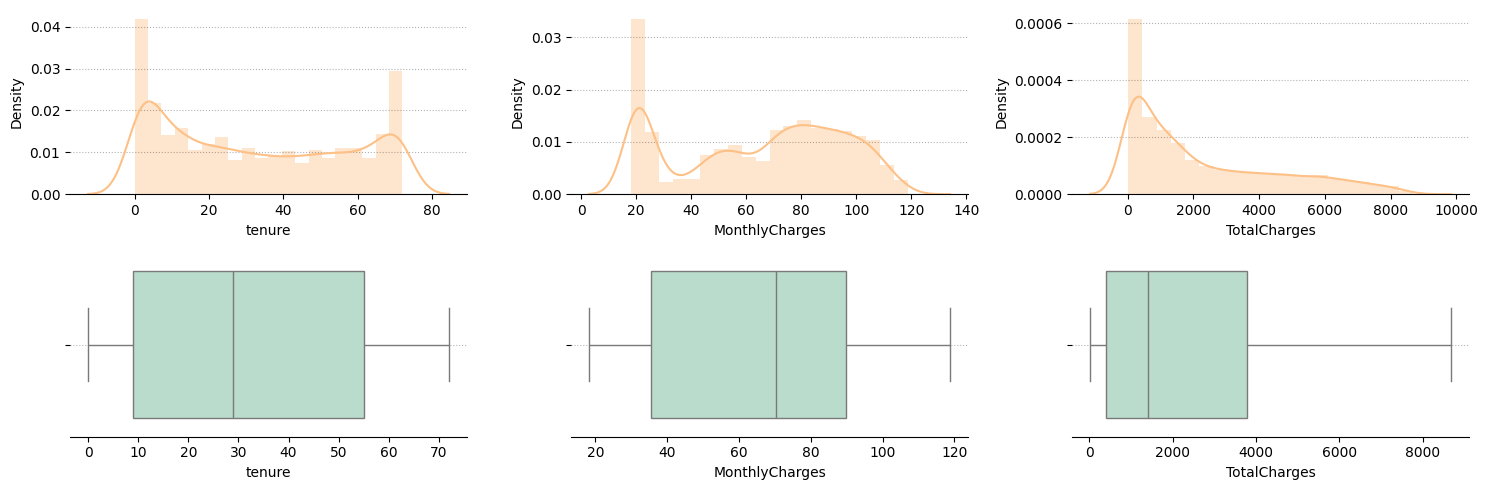

In [23]:
# For understanding the distribution among Numerical variables we will create bins
fig, axes = plt.subplots(nrows=2,ncols=3,figsize=(15,5))
axes = axes.flatten()

for i,cols in enumerate(num_cols):
  sns.distplot(ax=axes[i],x=data[cols],bins=20,color='#FDC086')
  section(axes[i])
  gridlines(axes[i])
  axes[i].set_xlabel(cols)

for i,cols in enumerate(num_cols):
  sns.boxplot(ax=axes[i+3],data=data,x=cols,color='#B3E2CD')
  section(axes[i+3])
  gridlines(axes[i+3])
  axes[i+3].set_xlabel(cols)

plt.tight_layout()
plt.show()

## **OBSERVATION**
1. The density of customers in 0-10 bins for tenure, monthly charges and total charges are high
2. The Total Charges graph is right skewed. There is high possibility of outliers for which we have to do further analysis

## **Variable vs Churn**

In [24]:
# For further analysis we are doing a group by based on Churn
data_grouped = data.groupby(by='Churn')

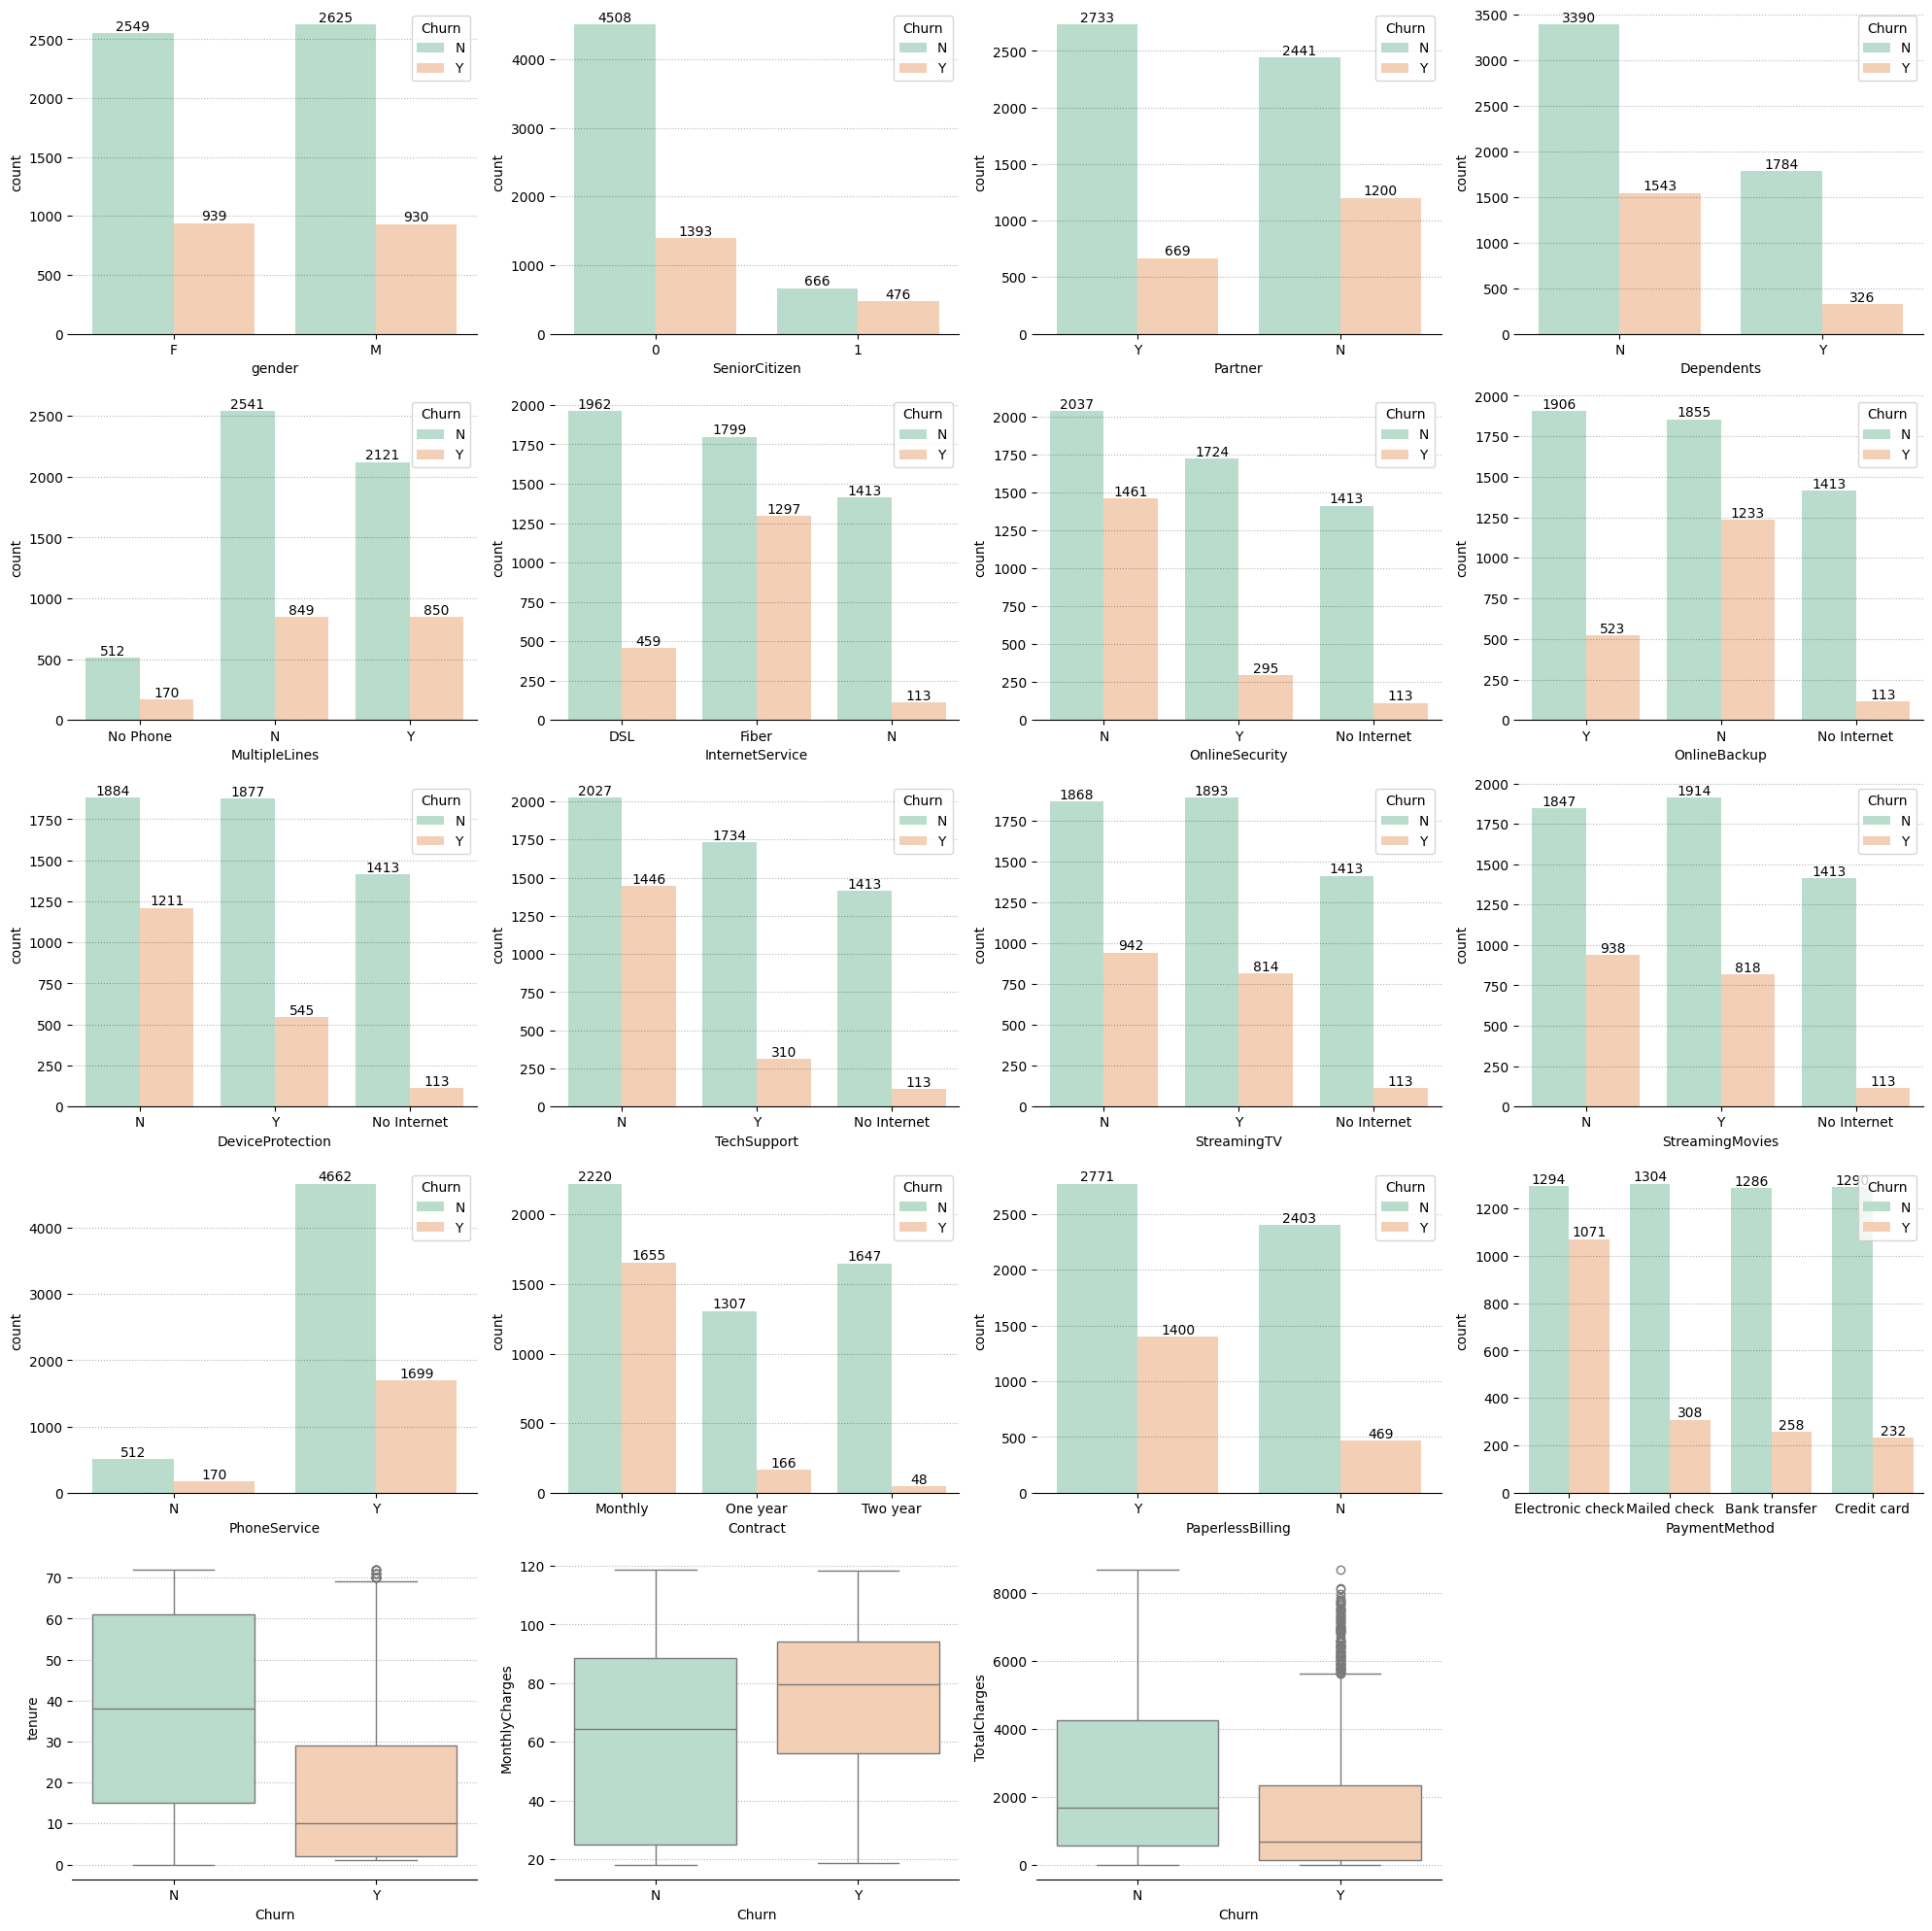

In [25]:
# We are plotting graph to compare all the variables along with our target variable
fig, axes = plt.subplots(nrows=5,ncols=4,figsize=(20,20))
axes = axes.flatten()

for i,cols in enumerate(cat_cols[1:17]):
  sns.countplot(ax=axes[i],data=data,x=cols,hue='Churn',palette='Pastel2')
  count = data[cols].nunique()
  axes[i].bar_label(axes[i].containers[0])
  axes[i].bar_label(axes[i].containers[1])
  section(axes[i])
  gridlines(axes[i])

for i,cols in enumerate(num_cols):
  sns.boxplot(ax=axes[i+16],data=data,y=cols,x='Churn',hue='Churn',palette='Pastel2')
  section(axes[i+16])
  gridlines(axes[i+16])

empty_subplot(axes[19])

plt.tight_layout()
plt.show()

## **Contribution to the churned revenue**
Following graph represents percent contributed by customers in each tenure bin to the lost or churned revenue

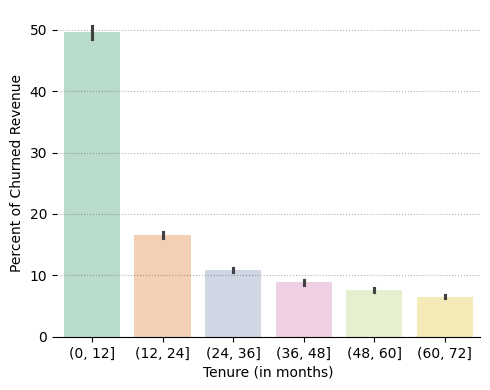

In [26]:
churned_user = data_grouped.get_group('Y')
bins = [(0, 12), (12, 24), (24, 36), (36, 48), (48, 60), (60, 72)]
binned_tenure = pd.cut(list(churned_user['tenure']),bins = pd.IntervalIndex.from_tuples(bins))
revenue_shared = churned_user['MonthlyCharges']/churned_user['MonthlyCharges'].sum()
temp_df = pd.DataFrame(data={'Tenure':binned_tenure,'Revenue_share(%)':revenue_shared*100})

fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(5,4))

viz = sns.barplot(ax=axes,data=temp_df,x='Tenure',y='Revenue_share(%)',
                  palette='Pastel2',estimator=np.sum)
viz.set_xlabel('Tenure (in months)')
viz.set_ylabel('Percent of Churned Revenue')
section(viz)
gridlines(viz)

plt.tight_layout()
plt.show()

In [27]:
# Explanation on estimator:
# Estimator in box plot is used to control how the height of the bars to be calculated
temp_df.groupby('Tenure').agg(Count=('Revenue_share(%)',np.size),
                              Sum=('Revenue_share(%)',np.sum),
                              Mean=('Revenue_share(%)',np.mean))

,Count,Sum,Mean
Tenure,,,
"(0, 12]",1037,49.560719,0.047792
"(12, 24]",294,16.589886,0.056428
"(24, 36]",180,10.901932,0.060566
"(36, 48]",145,8.836681,0.060943
"(48, 60]",120,7.605718,0.063381
"(60, 72]",93,6.505063,0.069947


## **OBSERVATION**
Here we can see that 50% of revenue is because of the short tenure customers. This means that monthly charges of the short tenure customers is more than that of high tenure customers. Therefore, if the ML models are successful in identifying the low tenure customers, then a major chunk of the revenue can be retained.

## **Churn among different contract types**

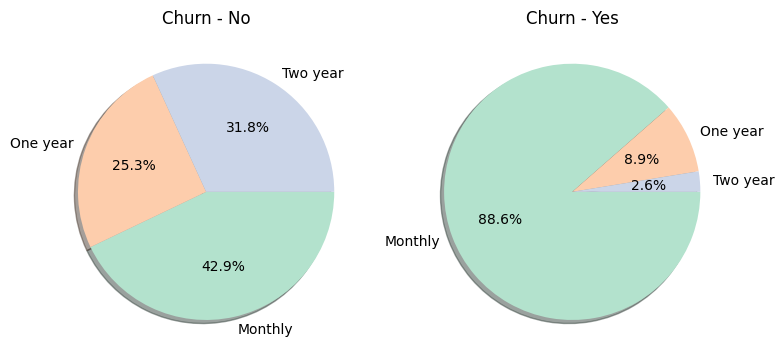

In [28]:
target_count = data.groupby(['Contract','Churn']).size().unstack()
contract_labels = target_count.index.tolist()

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(8,8))

colors = sns.color_palette('Pastel2')
axes[0].pie(target_count['N'],labels=contract_labels,colors=colors,autopct='%0.1f%%',shadow=True,counterclock=False)
axes[0].set_title('Churn - No')
axes[1].pie(target_count['Y'],labels=contract_labels,colors=colors,autopct='%0.1f%%',shadow=True,counterclock=False)
axes[1].set_title('Churn - Yes')

plt.tight_layout()
plt.show()

## **OBSERVATION**
When the customer opt for Two year contract the chances of attrition is very low compared to when its a monthly contract

## **Churn against Internet along various services**

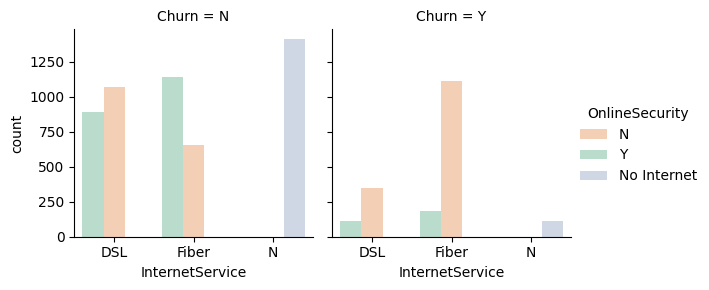

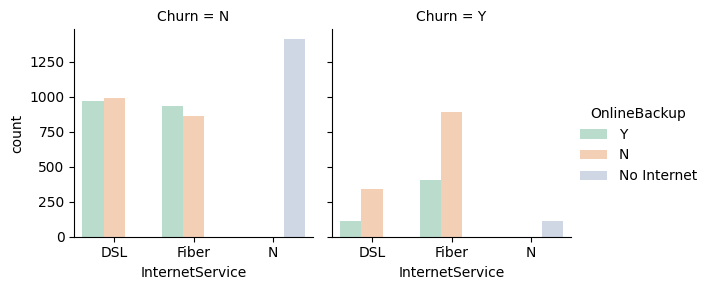

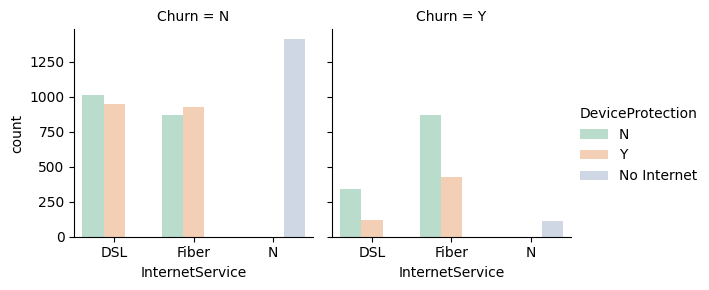

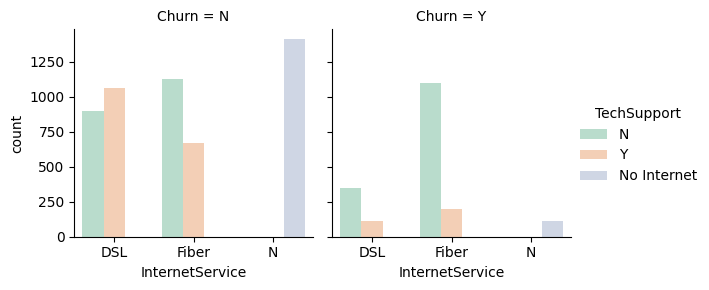

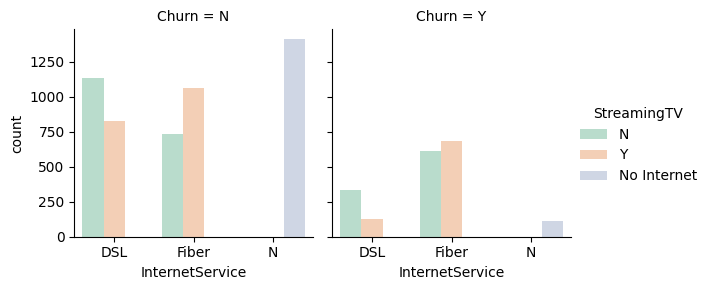

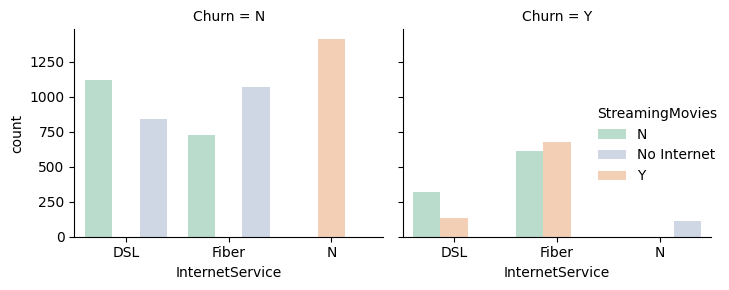

In [29]:
columns = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

for i,cols in enumerate(columns):
  g = sns.FacetGrid(data, col="Churn")
  g.map_dataframe(sns.countplot, x="InternetService",hue=cols,palette='Pastel2')
  g.add_legend(title=cols)

plt.tight_layout()
plt.show()

## **OBSERVATION**
1. When the customer doesnt have internet he isn't able to avail other features like OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies
2. Churn rate is high when the customer has not opted for Online Security, Tech Support,
3. Incase they have opted for Fibre Optics Internet services, Device Protection the churn rate is low


## **Churn split based on Senior Citizen**

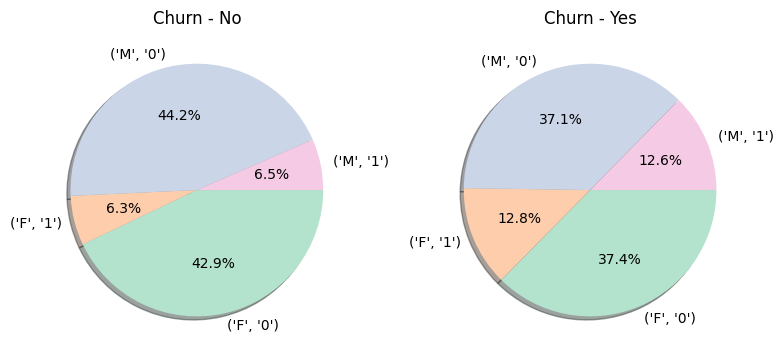

In [30]:
target_count = data.groupby(['gender','SeniorCitizen','Churn']).size().unstack()
contract_labels = target_count.index.tolist()

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(8,8))

colors = sns.color_palette('Pastel2')
axes[0].pie(target_count['N'],labels=contract_labels,colors=colors,autopct='%0.1f%%',shadow=True,counterclock=False)
axes[0].set_title('Churn - No')
axes[1].pie(target_count['Y'],labels=contract_labels,colors=colors,autopct='%0.1f%%',shadow=True,counterclock=False)
axes[1].set_title('Churn - Yes')

plt.tight_layout()
plt.show()

## **Comparison of the Numerical Variables**

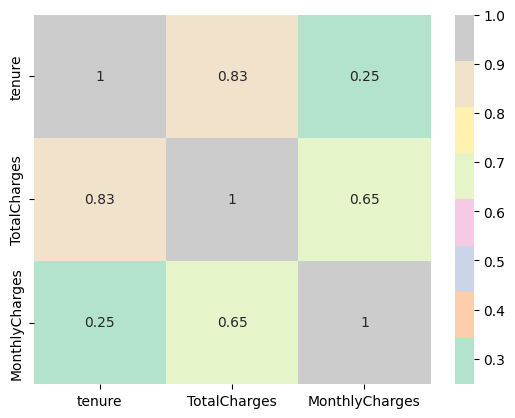

In [31]:
sns.heatmap(data=data[['tenure','TotalCharges','MonthlyCharges']].corr(),
            annot=True,cmap='Pastel2')
plt.show()

## **OBSERVATION**
1. We can see from correlation matrix, that Total Charges is the total monthly charges over the tenure of the customer. Hence Total Charges is highly correlated with Monthly Charges and Tenure

## **Tenure based on Contract**

Text(0.5, 1.0, 'Two Year Contract')

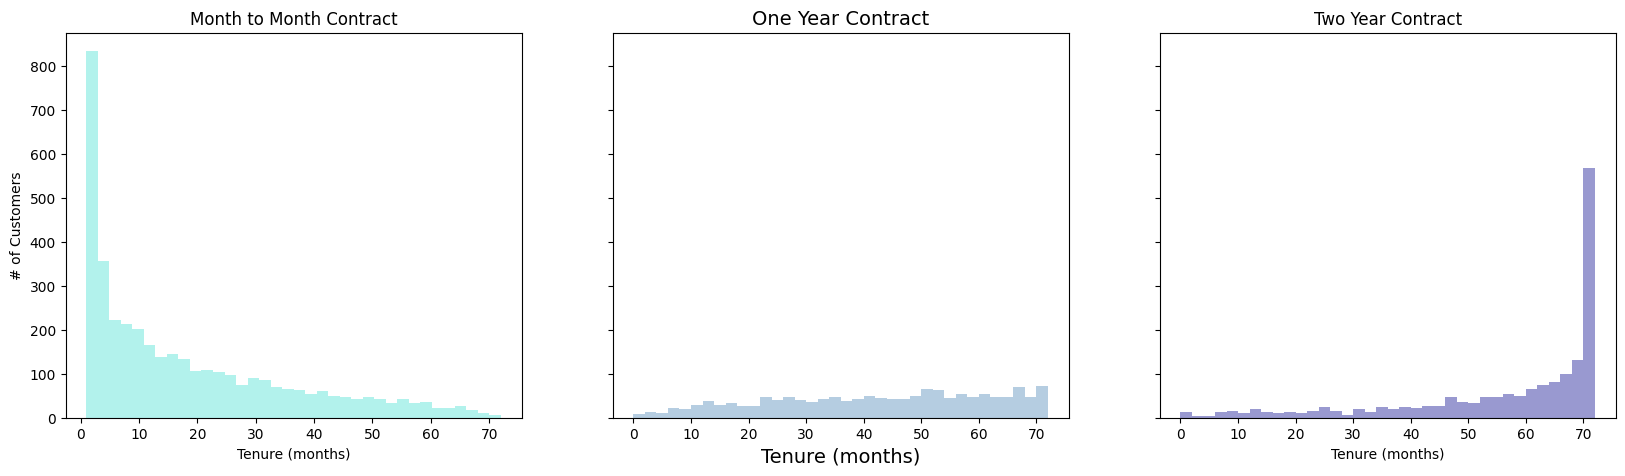

In [32]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,5))

ax = sns.distplot(data[data['Contract']=='Monthly']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(data[data['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(data[data['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

## **OBSERVATION**
1. Most of the monthly contracts last for 1-2 months whereas 2-year contracts last more than 70 months. Hence customer taking longer contract is loyal towards the company

## **Target (Churn) Analysis**

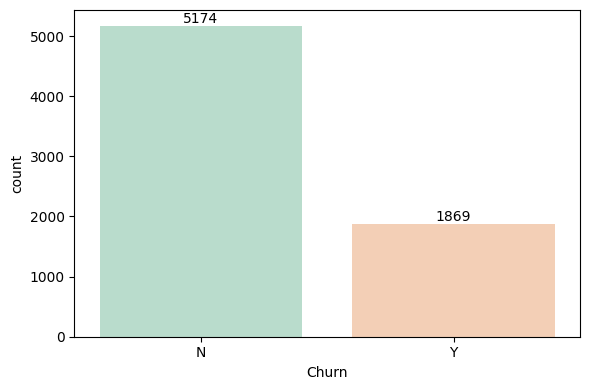

In [33]:
plt.figure(figsize=(6,4))

viz = sns.countplot(data=data,x='Churn',palette='Pastel2')
for container in viz.containers:
    viz.bar_label(container)

plt.tight_layout()
plt.show()

In [34]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [35]:
# For analysis purpose converting all the Categorical columns to numerical
# Drop CustomerId column also
data_dummy = data.drop(columns=['customerID'])
data_dummy = pd.get_dummies(data_dummy, drop_first=True, dtype='int')
data_dummy.head()

,tenure,MonthlyCharges,TotalCharges,gender_M,SeniorCitizen_1,Partner_Y,Dependents_Y,MultipleLines_No Phone,MultipleLines_Y,InternetService_Fiber,...,StreamingMovies_No Internet,StreamingMovies_Y,PhoneService_Y,Contract_One year,Contract_Two year,PaperlessBilling_Y,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Y
0,1,29.85,29.85,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
1,34,56.95,1889.50,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2,2,53.85,108.15,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,1
3,45,42.30,1840.75,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2,70.70,151.65,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,1,0,1


<Axes: >

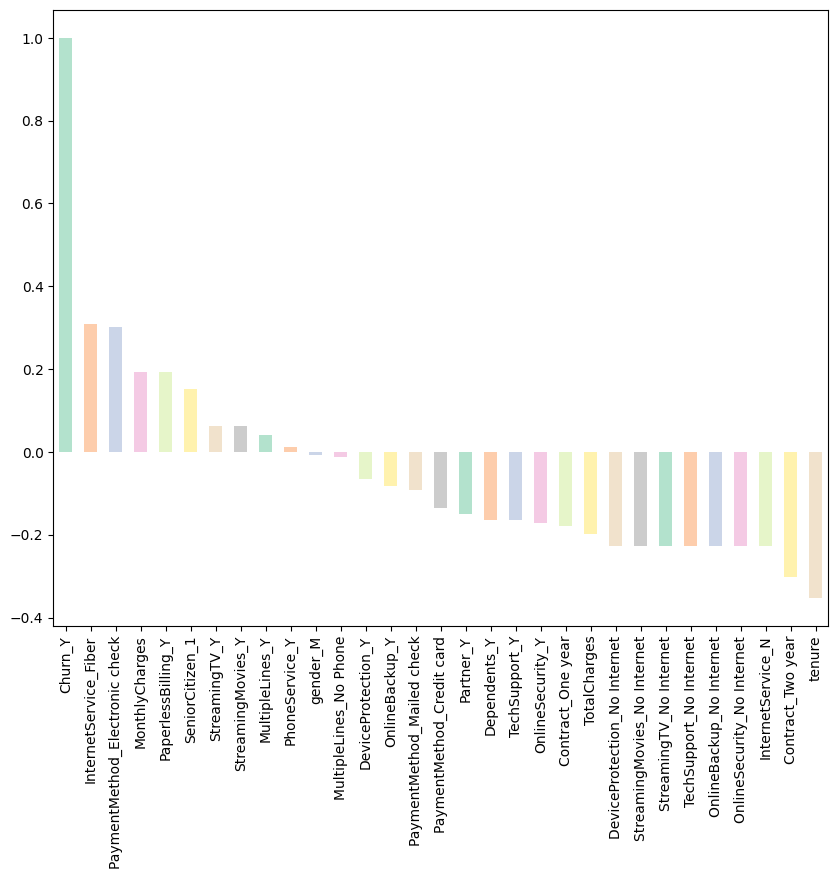

In [36]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(10,8))
palette = sns.color_palette("Pastel2")
data_dummy.corr()['Churn_Y'].sort_values(ascending = False).plot(kind='bar',color=palette)

## **OBSERVATION**
1. This is an imbalanced data, which needs to be processed before designing the model
2. Paperless Billing, Monthly Charges, absence of Online Security and Tech support seems to be positively correlated with Churn.
3. Tenure, two year contract seems to be negatively correlated with Churn
4. Services such as Online security, streaming TV, online backup, tech support, etc. without internet connection seem to be negatively related to churn.

<a name="Data_Preprocessing"></a>
# **DATA PREPROCESSING**
**GOAL**
1. Prepare the data to use for training the model
2. Split the data into Independant and Dependant variables
3. Do Train - Test split for the model training
4. Also we have to convert all the categorical columns to numerical columns via Encoding
5. Since the data is highly imbalanced we have to use SMOTE method to balance it
6. For numerical columns we arent sure about the unit so have to do standardization

## **Independant vs Dependant**

In [37]:
e_data = data.copy()
e_data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,F,0,Y,N,No Phone,DSL,N,Y,N,...,N,N,1,N,Monthly,Y,Electronic check,29.85,29.85,N
1,5575-GNVDE,M,0,N,N,N,DSL,Y,N,Y,...,N,N,34,Y,One year,N,Mailed check,56.95,1889.50,N


In [38]:
x = e_data.iloc[:, 1:-1]
y = e_data['Churn']
print(f"Independent DataFrame Shape : {x.shape}")
print(f"Dependent DataFrame Shape : {y.shape}")

Independent DataFrame Shape : (7043, 19)
Dependent DataFrame Shape : (7043,)


## **Train Test Split**

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
x_train_cat,x_test_cat,y_train_cat,y_test_cat = train_test_split(x,y,test_size=0.3,random_state=42)
print(f"Training Independent DataFrame Shape : {x_train.shape}")
print(f"Training Dependent DataFrame Shape : {y_train.shape}")
print(f"Testing Independent DataFrame Shape : {x_test.shape}")
print(f"Testing Dependent DataFrame Shape : {y_test.shape}")
print("********************* For Naive Bayes *********************")
print(f"Training Independent DataFrame Shape : {x_train_cat.shape}")
print(f"Training Dependent DataFrame Shape : {y_train_cat.shape}")
print(f"Testing Independent DataFrame Shape : {x_test_cat.shape}")
print(f"Testing Dependent DataFrame Shape : {y_test_cat.shape}")

Training Independent DataFrame Shape : (4930, 19)
Training Dependent DataFrame Shape : (4930,)
Testing Independent DataFrame Shape : (2113, 19)
Testing Dependent DataFrame Shape : (2113,)
********************* For Naive Bayes *********************
Training Independent DataFrame Shape : (4930, 19)
Training Dependent DataFrame Shape : (4930,)
Testing Independent DataFrame Shape : (2113, 19)
Testing Dependent DataFrame Shape : (2113,)


In [40]:
# Convert categorical columns to category instead of object
for cols in x_train.columns:
  if x_train[cols].dtypes == 'object':
    x_train[cols] = x_train[cols].astype('category')
    x_test[cols] = x_test[cols].astype('category')

x_test.dtypes

gender              category
SeniorCitizen       category
Partner             category
Dependents          category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
tenure                 int64
PhoneService        category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
dtype: object

## **Oversample Training Data - SMOTE**

Training Independent DataFrame Shape post balancing : (7270, 19)
Training Dependent DataFrame Shape post balancing : (7270,)
********************* For Naive Bayes *********************
Training Independent DataFrame Shape post balancing : (7270, 19)
Training Dependent DataFrame Shape post balancing : (7270,)


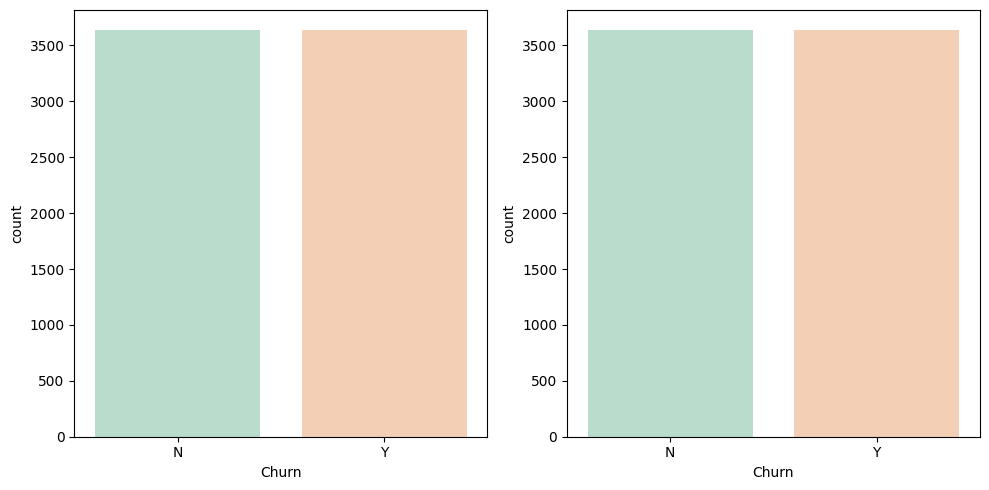

In [41]:
# SMOTE
from imblearn.over_sampling import SMOTENC

smote = SMOTENC(categorical_features=(x_train.dtypes=='category').values,random_state=42)

x_sm,y_sm = smote.fit_resample(x_train,y_train)
print(f"Training Independent DataFrame Shape post balancing : {x_sm.shape}")
print(f"Training Dependent DataFrame Shape post balancing : {y_sm.shape}")

print("********************* For Naive Bayes *********************")
x_cat_sm,y_cat_sm = smote.fit_resample(x_train_cat,y_train_cat)

print(f"Training Independent DataFrame Shape post balancing : {x_cat_sm.shape}")
print(f"Training Dependent DataFrame Shape post balancing : {y_cat_sm.shape}")

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))

sns.countplot(x=y_sm,palette='Pastel2',ax=ax[0])
sns.countplot(x=y_cat_sm,palette='Pastel2',ax=ax[1])

plt.tight_layout()
plt.show()

In [42]:
info(x_sm)

,Column_Name,Data_Type,Missing_Value_Per,Unique_Value_Count,Unique_Values,Sample_1,Sample_2
0,gender,category,0,2,"['M', 'F'] Categories (2, object): ['F', 'M']",M,M
1,SeniorCitizen,category,0,2,"['0', '1'] Categories (2, object): ['0', '1']",0,0
2,Partner,category,0,2,"['Y', 'N'] Categories (2, object): ['N', 'Y']",Y,N
3,Dependents,category,0,2,"['Y', 'N'] Categories (2, object): ['N', 'Y']",Y,N
4,MultipleLines,category,0,3,"['Y', 'N', 'No Phone'] Categories (3, object):...",Y,N
5,InternetService,category,0,3,"['DSL', 'Fiber', 'N'] Categories (3, object): ...",DSL,Fiber
6,OnlineSecurity,category,0,3,"['N', 'No Internet', 'Y'] Categories (3, objec...",N,N
7,OnlineBackup,category,0,3,"['Y', 'N', 'No Internet'] Categories (3, objec...",Y,N
8,DeviceProtection,category,0,3,"['N', 'No Internet', 'Y'] Categories (3, objec...",N,N
9,TechSupport,category,0,3,"['Y', 'N', 'No Internet'] Categories (3, objec...",Y,N


## **Encoding and Standardization**

In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

cat_cols = list(x_sm.select_dtypes(include='category').columns)
num_cols = list(x_sm.select_dtypes(include=['int64','float64']).columns)

# Column Transformer
transformers = [('one_hot_encoder',OneHotEncoder(drop='first',dtype='int'),cat_cols),
                ('standard_scaler',StandardScaler(),num_cols)]
x_trans = ColumnTransformer(transformers,remainder = 'passthrough')

# Applying Column Transformer
x_train_en = x_trans.fit_transform(x_sm)
x_test = x_trans.transform(x_test)

# Label Encoding
y_trans = LabelEncoder()
y_train_en = y_trans.fit_transform(y_sm)
y_test = y_trans.transform(y_test)

x_train_en

array([[ 1.        ,  0.        ,  1.        , ...,  1.09450374,
         0.08470734,  0.78029525],
       [ 1.        ,  0.        ,  0.        , ..., -1.12782922,
         0.4264918 , -0.91416786],
       [ 1.        ,  0.        ,  0.        , ..., -0.62465949,
        -1.69881761, -0.83191214],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -0.54079787,
        -0.1851986 , -0.4948007 ],
       [ 1.        ,  0.        ,  0.        , ..., -1.12782922,
         0.06832409, -0.91890854],
       [ 0.        ,  0.        ,  1.        , ...,  0.04623348,
         0.78575453,  0.313755  ]])

<a name="Data_Modeling"></a>
# **DATA MODELING**
**GOAL**
1. Try different classification algorithm's for our dataset and find their accuracy
2. Conclude on which model is the best fittest in this scenario

## **Functions**

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

def model_report(y_test,y_pred,confusion_lbs):
  report = classification_report(y_test,y_pred,target_names=confusion_lbs)
  print("***************NAIVE BAYE's REPORT***************")
  print(report)

  cm = confusion_matrix(y_test,y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=confusion_lbs)

  disp.plot(cmap='Pastel2')
  for text in disp.text_.ravel():
    text.set_color('black')
  plt.title("***************CONFUSION MATRIX***************")
  plt.tight_layout()
  plt.show()

<a name="Naive_Bayes"></a>
## **Naive Bayes**

### **Column Transformer**

In [45]:
from sklearn.preprocessing import KBinsDiscretizer, OrdinalEncoder

# We are using this to convert for Niave Bayes Algorithm
confusion_lbs = ['No Churn','Churn']

## Discretize 'monthlycharges' and 'totalcharges' into 3bins
kbn = KBinsDiscretizer(n_bins=3,encode='ordinal')
ode = OrdinalEncoder(dtype=np.int64)
# initialize CustomTransformer
nb_trans = [('ordinal',ode,cat_cols),
            ('kbn',kbn,num_cols[1:])]
nb_col_trans = ColumnTransformer(nb_trans,remainder='passthrough')

## Apply column transfer to train and test
x_train_nb = nb_col_trans.fit_transform(x_cat_sm)
x_test_nb = nb_col_trans.transform(x_test_cat)


### **Model**

In [46]:
from sklearn.naive_bayes import CategoricalNB
nb_model = CategoricalNB()
nb_model.fit(x_train_nb,y_cat_sm)
nb_y_pred = nb_model.predict(x_test_nb)
nb_y_pred

array(['Y', 'N', 'N', ..., 'N', 'Y', 'N'], dtype='<U1')

### **Result**

In [47]:
nb_score = nb_model.score(x_train_nb,y_cat_sm)
print(f"NAIVE BAYE's ACCURACY SCORE : {round((nb_score*100),2)}%")

NAIVE BAYE's ACCURACY SCORE : 77.73%


***************NAIVE BAYE's REPORT***************
              precision    recall  f1-score   support

    No Churn       0.92      0.71      0.80      1539
       Churn       0.52      0.83      0.64       574

    accuracy                           0.74      2113
   macro avg       0.72      0.77      0.72      2113
weighted avg       0.81      0.74      0.76      2113



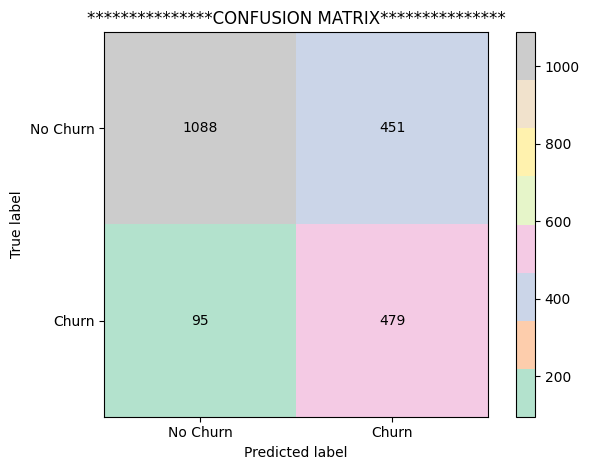

In [48]:
model_report(y_test_cat,nb_y_pred,confusion_lbs)

<a name="Logistic_Regression"></a>
## **Logistic Regression**

### **Model**

In [49]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train_en,y_train_en)
lr_y_pred = lr_model.predict(x_test)
lr_y_pred

array([1, 0, 0, ..., 0, 1, 0])

### **Result**

In [50]:
lr_score = lr_model.score(x_train_en,y_train_en)
print(f"LOGISTIC REGRESSION ACCURACY SCORE : {round((lr_score*100),2)}%")

LOGISTIC REGRESSION ACCURACY SCORE : 79.74%


***************NAIVE BAYE's REPORT***************
              precision    recall  f1-score   support

    No Churn       0.91      0.76      0.83      1539
       Churn       0.55      0.79      0.65       574

    accuracy                           0.77      2113
   macro avg       0.73      0.78      0.74      2113
weighted avg       0.81      0.77      0.78      2113



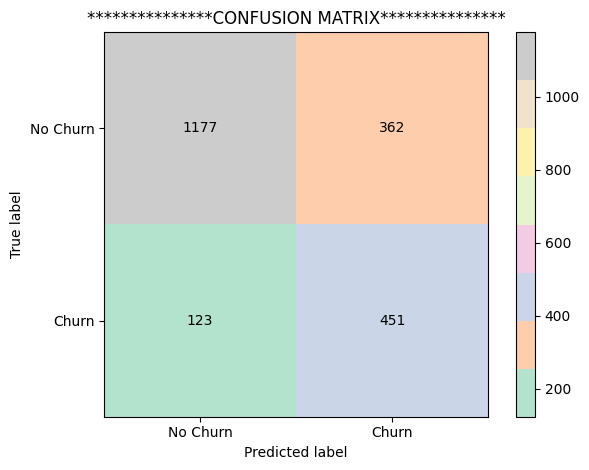

In [51]:
model_report(y_test,lr_y_pred,confusion_lbs)

<a name="KN_Neighbour"></a>
## **K-Nearest Neighbour**

### **Cross Validation**

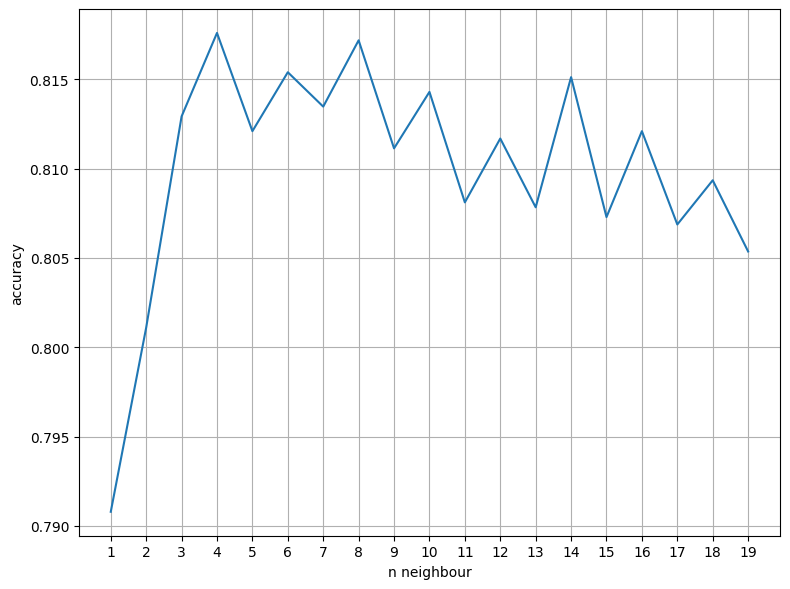

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
k_values = range(1,20)

cv_score = []

for k in k_values:
  knn = KNeighborsClassifier(n_neighbors = k)
  score = cross_val_score(knn,x_train_en,y_train_en,cv=10,scoring='accuracy')
  cv_score.append(score.mean())

plt.figure(figsize=(8,6))
plt.plot(k_values,cv_score)
plt.ylabel('accuracy')
plt.xlabel('n neighbour')
plt.xticks(k_values)
plt.grid()
plt.tight_layout()
plt.show()

In [53]:
optimum_k = k_values[cv_score.index(max(cv_score))]
print(f"Optimum K-value : {optimum_k}")

Optimum K-value : 4


### **Model**

In [54]:
from sklearn.neighbors import KNeighborsClassifier

kn_model = KNeighborsClassifier(n_neighbors=4)
kn_model.fit(x_train_en,y_train_en)
kn_y_pred = kn_model.predict(x_test)
kn_y_pred

array([1, 0, 0, ..., 0, 1, 0])

### **Result**

In [55]:
kn_score = kn_model.score(x_train_en,y_train_en)
print(f"K-NEAREST NEIGHBOUR ACCURACY SCORE : {round((kn_score*100),2)}%")

K-NEAREST NEIGHBOUR ACCURACY SCORE : 88.58%


***************NAIVE BAYE's REPORT***************
              precision    recall  f1-score   support

    No Churn       0.85      0.82      0.83      1539
       Churn       0.55      0.60      0.57       574

    accuracy                           0.76      2113
   macro avg       0.70      0.71      0.70      2113
weighted avg       0.76      0.76      0.76      2113



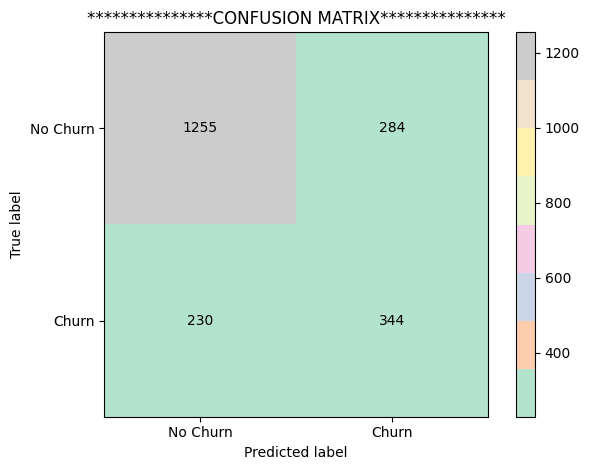

In [56]:
model_report(y_test,kn_y_pred,confusion_lbs)

<a name="Decision_Tree"></a>
## **Decision Tree**

### **Find Depth**

7


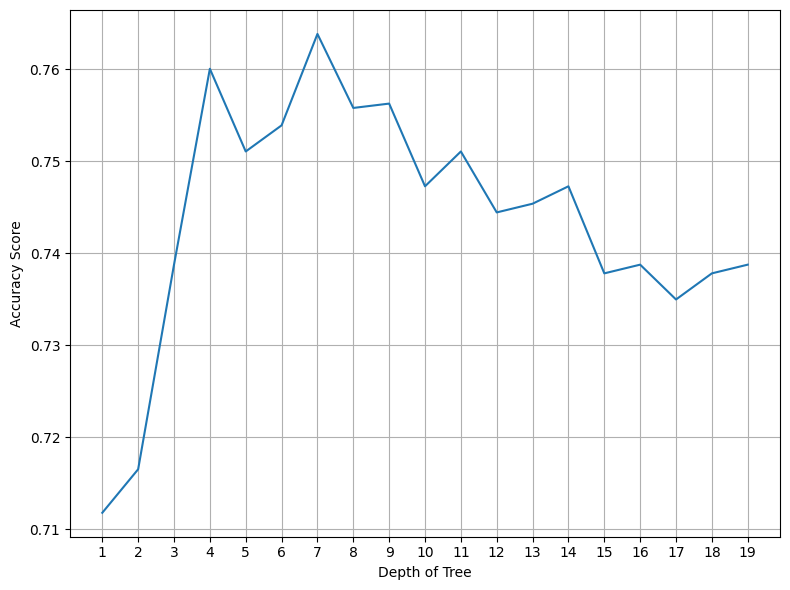

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

k_values = range(1,20)
depth = []

for i in k_values:
  dt_model = DecisionTreeClassifier(random_state=42,max_depth=i,criterion='gini')
  dt_model.fit(x_train_en,y_train_en)
  dt_y_pred = dt_model.predict(x_test)
  depth.append(accuracy_score(y_test,dt_y_pred))

optimum_depth = k_values[depth.index(max(depth))]
print(optimum_depth)

plt.figure(figsize=(8,6))
plt.plot(k_values,depth)
plt.xlabel("Depth of Tree")
plt.ylabel("Accuracy Score")
plt.xticks(k_values)
plt.grid()
plt.tight_layout()
plt.show()

### **Model**

In [58]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42, max_depth=optimum_depth, criterion='gini')
dt_model.fit(x_train_en,y_train_en)

dt_y_pred = dt_model.predict(x_test)
dt_y_pred

array([1, 0, 0, ..., 0, 1, 0])

### **Result**

In [59]:
dt_score = dt_model.score(x_train_en,y_train_en)
print(f"DECISION TREE ACCURACY SCORE : {round((dt_score*100),2)}%")

DECISION TREE ACCURACY SCORE : 83.04%


***************NAIVE BAYE's REPORT***************
              precision    recall  f1-score   support

    No Churn       0.89      0.77      0.83      1539
       Churn       0.55      0.74      0.63       574

    accuracy                           0.76      2113
   macro avg       0.72      0.76      0.73      2113
weighted avg       0.80      0.76      0.77      2113



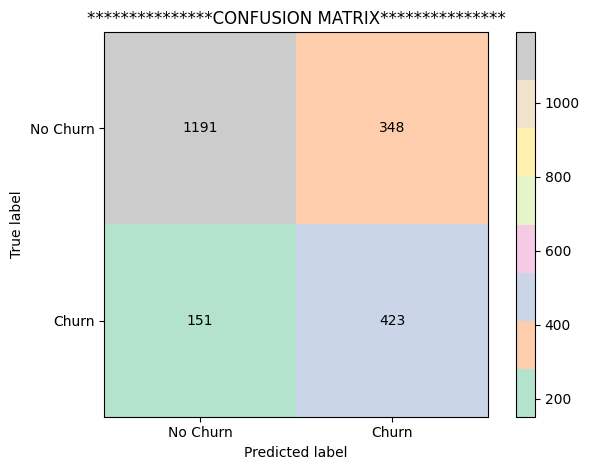

In [60]:
model_report(y_test,dt_y_pred,confusion_lbs)

<a name="Random_Forest"></a>
## **Random Forest**

### **Model**

In [61]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=1000 , oob_score = True, criterion ='gini',
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
rf_model.fit(x_train_en, y_train_en)
rf_y_pred = rf_model.predict(x_test)
rf_y_pred

array([1, 0, 0, ..., 0, 1, 0])

### **Result**

In [62]:
rf_score = rf_model.score(x_train_en,y_train_en)
print(f"RANDOM FOREST ACCURACY SCORE : {round(rf_score*100,2)}%")

RANDOM FOREST ACCURACY SCORE : 82.52%


***************NAIVE BAYE's REPORT***************
              precision    recall  f1-score   support

    No Churn       0.89      0.80      0.84      1539
       Churn       0.58      0.74      0.65       574

    accuracy                           0.78      2113
   macro avg       0.74      0.77      0.75      2113
weighted avg       0.81      0.78      0.79      2113



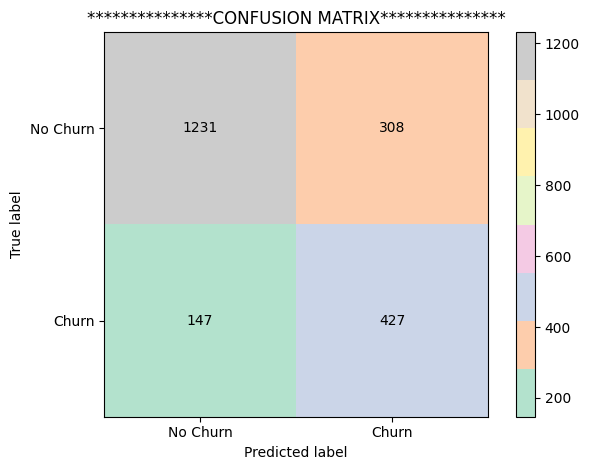

In [64]:
model_report(y_test,rf_y_pred,confusion_lbs)

<a name="Support_Vector_Machine"></a>
## **Support Vector Machine**

### **Model**

In [65]:
from sklearn.svm import SVC
sv_model = SVC(kernel='linear')
sv_model.fit(x_train_en,y_train_en)
sv_y_pred = sv_model.predict(x_test)
sv_y_pred

array([1, 0, 0, ..., 0, 1, 0])

### **Result**

In [66]:
sv_score = sv_model.score(x_train_en,y_train_en)
print(f"SUPPORT VECTOR MACHINE ACCURACY SCORE : {round(sv_score*100,2)}% ")

SUPPORT VECTOR MACHINE ACCURACY SCORE : 79.88% 


***************NAIVE BAYE's REPORT***************
              precision    recall  f1-score   support

    No Churn       0.91      0.77      0.83      1539
       Churn       0.56      0.79      0.65       574

    accuracy                           0.77      2113
   macro avg       0.73      0.78      0.74      2113
weighted avg       0.81      0.77      0.78      2113



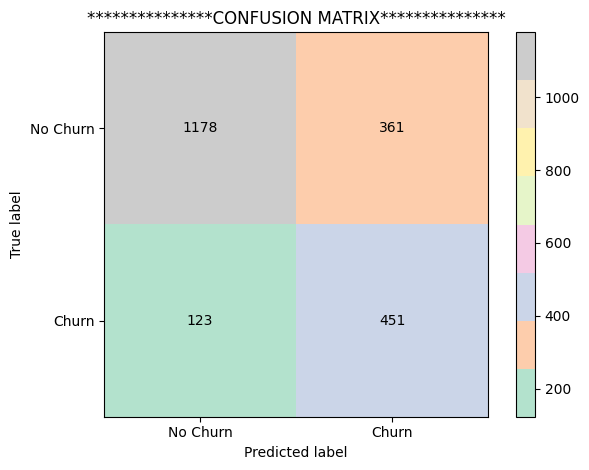

In [67]:
model_report(y_test,sv_y_pred,confusion_lbs)

<a name="Final_Analysis"></a>
# **FINAL ANALYSIS**
1. Compare the accuracy, precision, recall and F1 score for all the models
2. Finalize on the best model which can be used to predict the churn rate

## **Accuracy Comparison**

In [81]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

model_name = ['Naive Bayes','Logistic Regression','K_Nearest Neighbour','Decision Tree','Random Forest','Support Vector Machine']
model_output = [nb_y_pred,lr_y_pred,kn_y_pred,dt_y_pred,rf_y_pred,sv_y_pred]
acc_score = []

for i,name in enumerate(model_output):
  acc_score.append(round((accuracy_score(y_test,name))*100,2))

output_df = pd.DataFrame({
    'Model':model_name,
    'Accuracy Score':acc_score,
})

output_df

,Model,Accuracy Score
0,Naive Bayes,0.00
1,Logistic Regression,77.05
2,K_Nearest Neighbour,75.67
3,Decision Tree,76.38
4,Random Forest,78.47
5,Support Vector Machine,77.09


## **Graphical Representation**

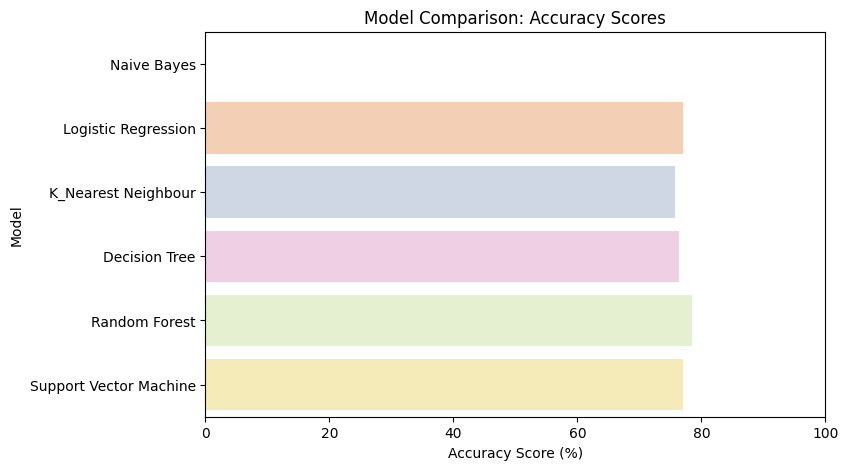

In [88]:
# Plot the accuracy scores
plt.figure(figsize=(8, 5))
sns.barplot(x='Accuracy Score', y='Model', data=output_df, palette='Pastel2')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Model')
plt.title('Model Comparison: Accuracy Scores')
plt.xlim(0, 100)  # Assuming accuracy is between 0 and 100
plt.show()

## **OBSERVATION**
Here we can see that the **Random Forest** has highest accuracy score. We need to note that this was the case when we straightaway applied the model without any hyperparameter tuning or Cross Validation. Our accuracy is bound to improve when we take additional steps. But this simple application is a good way to learn about applying models for classification problems!